In [ ]:
import xgboost as xgb
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.metrics import explained_variance_score

In [ ]:
df = pd.read_csv('Dataset 2.csv')

In [ ]:
df.head()

,COIL_ID,GRADE,COIL_GEN_TIME,FURN_EXIT_TEMP,FM_DOUT_TEMP,COILING_TEMP,SLAB_WID,SLAB_LEN,STRIP_EXIT_LEN,STRIP_EXIT_THIK,...,N,NI,P,S,SI,TI,V,UTS,YS,P_ELONGATION
0,20081459,JVHGLD4AS0,8/10/2020 2:25,1081,869,680,1125,10750.0,69.81,34,...,0.0025,0.007,0.018,0.0100,0.004,0.001,0.001,346,294,42
1,20097626,JVHGLD4AS0,9/14/2020 2:30,1070,838,662,1245,10640.0,68.63,34,...,0.0022,0.007,0.014,0.0100,0.007,0.001,0.001,365,299,42
2,20097722,JVHCM30A00,9/14/2020 6:47,1075,882,611,1040,10750.0,66.08,36,...,0.0070,0.008,0.015,0.0030,0.164,0.002,0.001,730,575,21
3,20098318,JVHST01C00,9/15/2020 11:55,1088,864,603,1260,9000.0,51.94,38,...,0.0035,0.008,0.021,0.0131,0.099,0.002,0.001,495,397,30
4,20098589,JVHWT02A00,9/16/2020 1:14,1061,848,650,1265,9811.0,61.23,35,...,0.0032,0.007,0.015,0.0101,0.006,0.001,0.001,379,326,41


In [ ]:
! pip install https://github.com/pandas-profiling/pandas-profiling/archive/master.zip 


Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
  Using cached https://github.com/pandas-profiling/pandas-profiling/archive/master.zip


In [ ]:
from pandas_profiling import ProfileReport

In [ ]:
profile = ProfileReport(df, title="property_prediction", html={'style':{'full_width':True}})

In [ ]:
profile.to_notebook_iframe()

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [ ]:
## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")## Correlation
import seaborn as sns
import matplotlib.pyplot as plt
#get correlations of each features in dataset
corrmat = df.corr()
top_corr_features = corrmat.index
plt.figure(figsize=(20,20))
#plot heat map
g=sns.heatmap(df[top_corr_features].corr(),annot=True,cmap="RdYlGn")

In [ ]:
X=df.drop(['COIL_ID','UTS','YS','P_ELONGATION','GRADE','COIL_GEN_TIME'],axis=1)

X

In [ ]:
y=df[['UTS'
       ]].values
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Fitting XGB regressor model and default base learner is Decision Tree
xgb_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=75, subsample=0.75, max_depth=7)
xgb_reg.fit(X_train, y_train)

In [ ]:
# Making Predictions
y_pred = xgb_reg.predict(X_test)


In [ ]:
# Variance_score
print((explained_variance_score(y_pred, y_test)))

In [ ]:
#  To convert data table into a matrix
kc_dmatrix = xgb.DMatrix(data=X, label=y, feature_names=X_train)

In [ ]:
#  Create the parameter dictionary: params
params = {"objective": "reg:linear", "max_depth": 2}

In [ ]:
# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=kc_dmatrix, num_boost_round=10)

In [ ]:
# Plot the first tree as num_trees = 0 and features importance
xgb.plot_tree(xg_reg, num_trees=0)

In [ ]:
xgb.plot_importance(xg_reg)

In [ ]:
from sklearn.metrics import mean_squared_error # for calculating the cost function
from sklearn.ensemble import RandomForestRegressor # for building the model

In [ ]:
import numpy as np

rmse=float(format(np.sqrt(mean_squared_error(y_pred,y_test)),'.3f'))

In [ ]:
print("\nRMSE:",rmse)


RMSE: 11.411


In [ ]:
from sklearn.model_selection import cross_val_score
GB_accuracies = cross_val_score(estimator =xgb_reg , X = X_train, y = y_train, cv = 8)
print("Mean_GB_Acc : ", GB_accuracies.mean())

In [ ]:
from sklearn.model_selection import GridSearchCV
from xgboost import XGBRegressor
xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train,
         y_train)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",xgb_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",xgb_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",xgb_grid.best_params_)


In [ ]:
X=df[['FM_DOUT_TEMP', 'STRIP_EXIT_LEN', 'C', 'NB', 'COILING_TEMP', 'MN', 'P', 'TI', 'CR', 'SI', 'FM_EXIT_THIK', 'N']]

In [ ]:
y=df[['UTS'
       ]].values
y

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [ ]:
# Fitting XGB regressor model and default base learner is Decision Tree
xgb_reg = xgb.XGBRegressor(objective="reg:linear", n_estimators=75, subsample=0.75, max_depth=7)
xgb_reg.fit(X_train, y_train)

In [ ]:
# Making Predictions
y_pred = xgb_reg.predict(X_test)

In [ ]:
# Variance_score
print((explained_variance_score(y_pred, y_test)))

In [ ]:
#  To convert data table into a matrix
kc_dmatrix = xgb.DMatrix(data=X, label=y, feature_names=X_train)

In [ ]:
#  Create the parameter dictionary: params
params = {"objective": "reg:linear", "max_depth": 2}

In [ ]:
# Train the model: xg_reg
xg_reg = xgb.train(params=params, dtrain=kc_dmatrix, num_boost_round=10)

In [ ]:
# Plot the first tree as num_trees = 0 and features importance
xgb.plot_tree(xg_reg, num_trees=0)

In [ ]:
xgb.plot_importance(xg_reg)

In [ ]:
import numpy as np

rmse=float(format(np.sqrt(mean_squared_error(y_pred,y_test)),'.3f'))

In [ ]:
print("\nRMSE:",rmse)

In [ ]:
from sklearn.model_selection import cross_val_score
GB_accuracies = cross_val_score(estimator =xgb_reg , X = X_train, y = y_train, cv =8)
print("Mean_GB_Acc : ", GB_accuracies.mean())

In [ ]:

xgb1 = XGBRegressor()
parameters = {'nthread':[4], #when use hyperthread, xgboost may become slower
              'objective':['reg:linear'],
              'learning_rate': [.03, 0.05, .07], #so called `eta` value
              'max_depth': [5, 6, 7],
              'min_child_weight': [4],
              'silent': [1],
              'subsample': [0.7],
              'colsample_bytree': [0.7],
              'n_estimators': [500]}

xgb_grid = GridSearchCV(xgb1,
                        parameters,
                        cv = 2,
                        n_jobs = 5,
                        verbose=True)

In [ ]:
xgb_grid.fit(X_train,
         y_train)

In [ ]:
print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",xgb_grid.best_estimator_)
print("\n The best score across ALL searched params:\n",xgb_grid.best_score_)
print("\n The best parameters across ALL searched params:\n",xgb_grid.best_params_)

In [ ]:
from sklearn.metrics import mean_absolute_error

In [ ]:
mean_absolute_error(y_test, y_pred)

7.87065855138223

In [ ]:
from sklearn.metrics import mean_squared_error

In [ ]:
mean_squared_error(y_test, y_pred)

134.71428519917328

In [ ]:
rmse=float(format(np.sqrt(mean_squared_error(y_pred,y_test)),'.3f'))

In [ ]:
print("\nRMSE:",rmse)


RMSE: 11.607


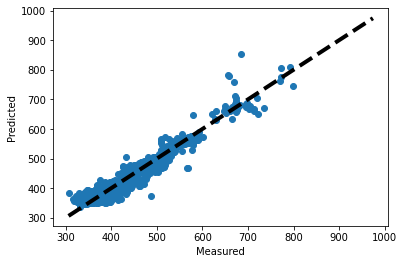

In [51]:
fig, ax = plt.subplots()
ax.scatter(y_test, y_pred)
ax.plot([y.min(), y.max()], [y.min(), y.max()], 'k--', lw=4)
ax.set_xlabel('Measured')
ax.set_ylabel('Predicted')
plt.show()